In [34]:
# coding: utf-8
import math
import random
import numpy as np
import matplotlib.pyplot as plt

import itertools
from scipy.special import comb
from scipy import stats

class Subsetselection:
    def __init__(self, absz, pri_para): # absz: alphabet size, pri_para: privacy parameter
        self.insz = absz #input alphabet size k
        self.exp = math.exp(pri_para)
        self.d = int(math.ceil(1.0*self.insz/(self.exp+1))) # number of 1s in output bit string 
        self.p = (1.0*self.d*self.exp)/(self.d*self.exp+self.insz-self.d)                                         
    def encode_symbol(self,ori):  # encode a single symbol into a privatized version
        sample = np.zeros(self.insz, dtype='bool')
        y_i = np.random.binomial(1,self.p)   
        if(y_i):
            sample[ori]=True
            temp = np.delete(np.array(range(self.insz)),ori, 0)
            temp2= np.random.choice(temp,self.d-1,replace=False)
            sample [temp2]= True
        else:
            sample[ori]=False
            temp = np.delete(np.array(range(self.insz)),ori, 0)
            temp2= np.random.choice(temp,self.d,replace=False)
            sample [temp2]= True
        return sample
     
    def encode_string(self,in_list):  # encode string into a privatized string
        out_list = [self.encode_symbol(x) for x in in_list]
        return out_list
    
    def decode_string(self, out_list, l): # get the privatized string and learn the original distribution
        temp1 = ((self.insz-1)*self.exp+1.0*(self.insz-1)*(self.insz-self.d)/self.d) / ((self.insz-self.d)*(self.exp-1))
        temp2 = ((self.d-1)*self.exp+self.insz-self.d) / (1.0*(self.insz-self.d)*(self.exp-1))
        #print (np.sum(out_list, axis=0))
        p_estimate = (1.0*np.sum(out_list, axis=0)*temp1/n)-temp2
        return p_estimate

l1 distance:  0.147877881893
prob_sum:  1.0


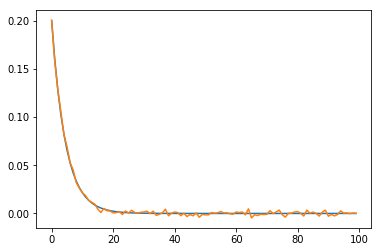

In [35]:
k = 100 #absz
n= 1000000
elements = range(0,k) #ab
lbd = 0.8 #parameter for geometric dist
eps = 1 # privacy_para
prob = [(1-lbd)*math.pow(lbd,x)/(1-math.pow(lbd,k)) for x in elements] # geometric dist
#prob = [1/float(k)] * k
in_list = np.random.choice(elements, n, p=prob) #input symbols
a = Subsetselection(k,eps) 
#print (a.partsz)
#print (elements.type)
# print(type(in_list[9]))
outp = a.encode_string(in_list)
prob_est = a.decode_string(outp,n) # estimate the original underlying distribution
plt.plot(elements,prob)
plt.plot(elements,prob_est)
#plt.plot(prob_est)
print ("l1 distance: ", str(np.linalg.norm([a_i - b_i for a_i, b_i in zip(prob, prob_est)], ord=1)))
print ("prob_sum: ", str(sum(prob_est)))